# Compute Generalized Additive Models for the Grid

This notebooks computes the Generalized Additive Models (GAM) that fit to the Temperature12K data.

In [2]:
import pandas as pd
import numpy as np
import os.path as osp
import os
from urllib import request
import matplotlib.pyplot as plt
import xarray as xr
import multiprocessing as mp
import psyplot.data as psyd
import psyplot.project as psy
from matplotlib.animation import FuncAnimation
import contextlib

In [6]:
ds = xr.open_dataset('/Volumes/shared/Transient Achille/temp12k/gridded-temp12k-pi-anomaly.nc',
                     decode_times=False).load()

In [5]:
millenial = ds.groupby(-ds.time - ((-ds.time) % 1000)).mean('time')
warmest = millenial.fillna(-9999).argmax('time').where(millenial.fillna(-9999).max('time') > -9999)
coldest = millenial.fillna(9999).argmin('time').where(millenial.fillna(9999).min('time') < 9999) 

/Users/psommer/miniconda/envs/temperature12k/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [12]:
for v in warmest:
    warmest[v].attrs.update(ds[v].attrs)
    coldest[v].attrs.update(ds[v].attrs) 
    warmest[v].encoding.update(ds[v].encoding) 
    coldest[v].encoding.update(ds[v].encoding) 

In [8]:
warmest = warmest.where(millenial.isnull().any('time'), -9999)
coldest = coldest.where(millenial.isnull().any('time'), -9999)

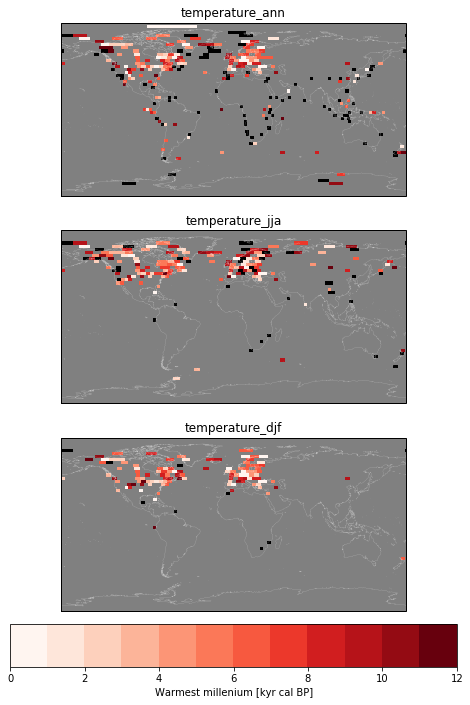

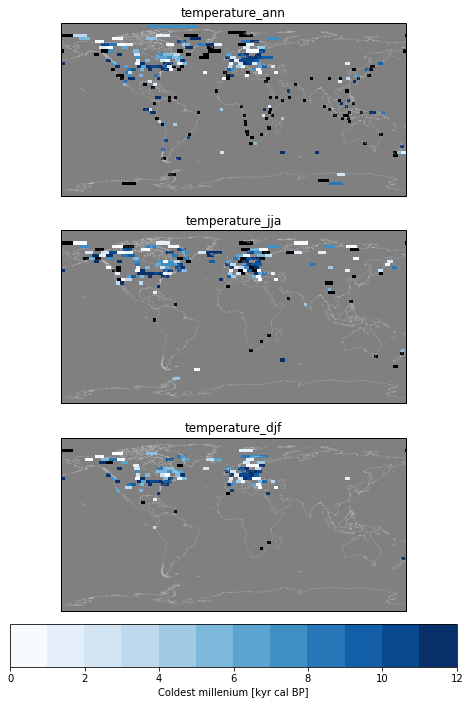

In [17]:
sp = warmest.psy.plot.mapplot(
    maskgeq=100, cmap='Reds', bounds=np.arange(13), xgrid=False, ygrid=False,
    lsm=False, title='%(name)s', ax=(3, 1),
    name=['temperature_ann', 'temperature_jja', 'temperature_djf'],
    cbar='fb', share='colors',
    map_extent='global', clabel='Warmest millenium [kyr cal BP]',
    post=("self.plotter.ax.coastlines('50m', color='w', linewidth=0.1)\n"
          "self.plotter.ax.background_patch.set_facecolor('0.5')\n"
          "self.plotter.plot.mappable.get_cmap().set_under('k')"),
    post_timing='replot', enable_post=True)
sp += coldest.psy.plot.mapplot(
    maskgeq=100, cmap='Blues', bounds=np.arange(13), xgrid=False, ygrid=False,
    lsm=False, title='%(name)s', ax=(3, 1),
    name=['temperature_ann', 'temperature_jja', 'temperature_djf'],
    cbar='fb', share='colors',
    map_extent='global', clabel='Coldest millenium [kyr cal BP]',
    post=("self.plotter.ax.coastlines('50m', color='w', linewidth=0.1)\n"
          "self.plotter.ax.background_patch.set_facecolor('0.5')\n"
          "self.plotter.plot.mappable.get_cmap().set_under('k')"),
    post_timing='replot', enable_post=True)

sp.export('../data/warmest-and-coldest-millenium.pdf')

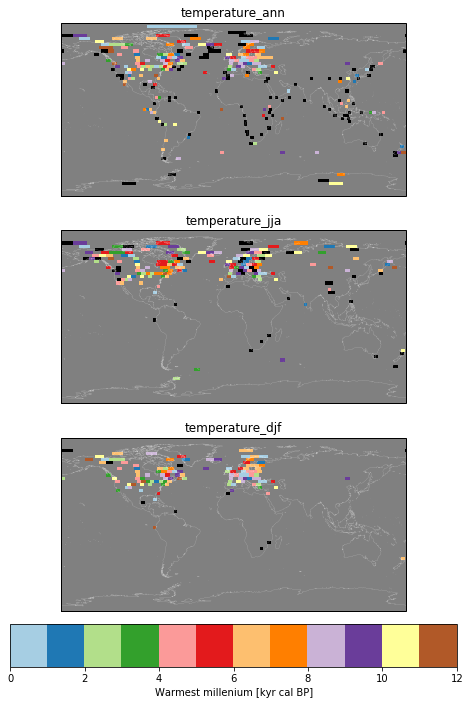

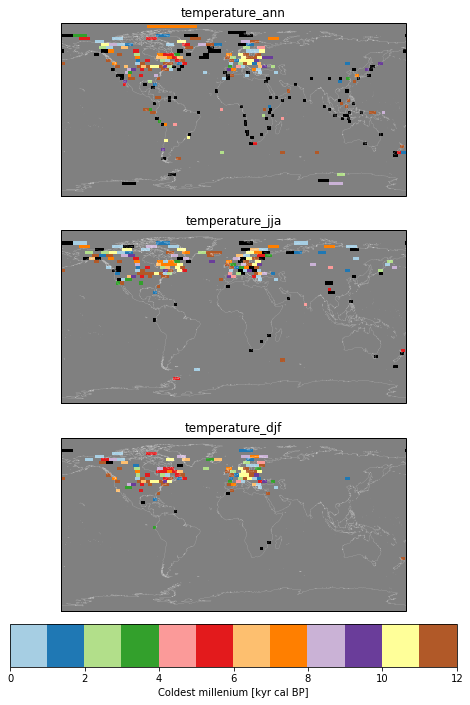

In [18]:
sp = warmest.psy.plot.mapplot(
    maskgeq=100, cmap='Paired', bounds=np.arange(13), xgrid=False, ygrid=False,
    lsm=False, title='%(name)s', ax=(3, 1),
    name=['temperature_ann', 'temperature_jja', 'temperature_djf'],
    cbar='fb', share='colors',
    map_extent='global', clabel='Warmest millenium [kyr cal BP]',
    post=("self.plotter.ax.coastlines('50m', color='w', linewidth=0.1)\n"
          "self.plotter.ax.background_patch.set_facecolor('0.5')\n"
          "self.plotter.plot.mappable.get_cmap().set_under('k')"),
    post_timing='replot', enable_post=True)
sp += coldest.psy.plot.mapplot(
    maskgeq=100, cmap='Paired', bounds=np.arange(13), xgrid=False, ygrid=False,
    lsm=False, title='%(name)s', ax=(3, 1),
    name=['temperature_ann', 'temperature_jja', 'temperature_djf'],
    cbar='fb', share='colors',
    map_extent='global', clabel='Coldest millenium [kyr cal BP]',
    post=("self.plotter.ax.coastlines('50m', color='w', linewidth=0.1)\n"
          "self.plotter.ax.background_patch.set_facecolor('0.5')\n"
          "self.plotter.plot.mappable.get_cmap().set_under('k')"),
    post_timing='replot', enable_post=True)

sp.export('../data/warmest-and-coldest-millenium-paired.pdf')

In [ ]:
psy.close('all')
bounds = np.arange(-5, 5.1, 0.5)
bounds = bounds[bounds != 0]
sp = ds.psy.plot.mapplot(
    maskgeq=100, cmap='RdBu_r', bounds=bounds, xgrid=False, ygrid=False,
    lsm=False, title='%(name)s: %(time)s yr cal BP', ax=(3, 1),
    name=['temperature_ann', 'temperature_jja', 'temperature_djf'],
    cbar='fb', share='colors',
    map_extent='global', clabel='Temperature anomaly to 1985 [°C]',
    post=("self.plotter.ax.coastlines('50m', color='w', linewidth=0.1)\n"
          "self.plotter.ax.background_patch.set_facecolor('0.5')"),
    post_timing='replot', enable_post=True)

for fig in sp.figs:
    fig.set_dpi(250)
    
def update(i):
    for arr in sp:
        sp.update(time=i, draw=False)
    sp.draw()
    
ani = FuncAnimation(fig, update, list(range(ds.dims['time'])), sp.draw)
ani.save('../data/temp12k-pi-anomaly-evolution.mp4', dpi=250, fps=4, writer='ffmpeg')